Guillermo Ramirez  
861299027  
EE 240  
HW 2  

### H2.1
(a) Show the the following log-logistic function is convex:  
$$f(\textbf{w})=log(1 + exp(−\textbf{w}^T \textbf{x}))$$
You may assume that $\textbf{x}$ is a scalar and show that the second derivative of $f(\textbf{w})$ w.r.t. $\textbf{w}$ is always positive.

$$\frac{\partial f(\textbf{w})}{\partial\textbf{w}}=\frac{\partial}{\partial\textbf{w}} log(1 + e^{−\textbf{w}^T \textbf{x}})$$
$$\frac{\partial f(\textbf{w})}{\partial\textbf{w}}=\frac{e^{−\textbf{w}^T \textbf{x}}(-\textbf{x})}{1 + e^{−\textbf{w}^T \textbf{x}}}$$


$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}=\frac{\partial}{\partial\textbf{w}}\frac{e^{−\textbf{w}^T \textbf{x}}(-\textbf{x})}{1 + e^{−\textbf{w}^T \textbf{x}}}$$


$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}=-\textbf{x}\frac{\partial}{\partial\textbf{w}} [e^{-\textbf{w}^T\textbf{x}}(1 + e^{−\textbf{w}^T \textbf{x}})^{-1}]$$

$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}=-\textbf{x}\left[\frac{e^{−\textbf{w}^T \textbf{x}}(-\textbf{x})}{1 + e^{−\textbf{w}^T \textbf{x}}}+\frac{-e^{−\textbf{w}^T \textbf{x}}(-\textbf{x})(e^{−\textbf{w}^T \textbf{x}})}{(1 + e^{−\textbf{w}^T \textbf{x}})^2}\right]$$

$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}=\textbf{x}^2\left[\frac{e^{−\textbf{w}^T \textbf{x}}}{1 + e^{−\textbf{w}^T \textbf{x}}}-\left(\frac{e^{−\textbf{w}^T \textbf{x}}}{1 + e^{−\textbf{w}^T \textbf{x}}}\right) ^2\right]$$

$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}=\textbf{x}^2\left[\frac{e^{−\textbf{w}^T \textbf{x}}(1 + e^{−\textbf{w}^T \textbf{x}})-(e^{−\textbf{w}^T \textbf{x}})^2}{(1 + e^{−\textbf{w}^T \textbf{x}})^2} \right]$$

$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}=\textbf{x}^2\left[\frac{e^{−\textbf{w}^T \textbf{x}}}{(1 + e^{−\textbf{w}^T \textbf{x}})^2} \right]$$

$$\frac{\partial ^2 f(\textbf{w})}{\partial \textbf{w}^2}\geq 0$$

(b) Next you will write a Python script for logistic regression that solves (1) using gradient descent algorithm with a fixed step size α. You will then use your code to learn to classify images of digits from the MNIST dataset.

In [1]:
import numpy as np
import scipy.io as sio
mnist =sio.loadmat('mnist-original.mat')
data=mnist['data']
label=mnist['label']
data = (data - np.mean(data,axis=0))/(np.std(data,axis=0)+0.1)

train_x = data[:,0:60000]
train_y = label[0,0:60000]
test_x = data[:,60000:70000]
test_y = label[0,60000:70000]
#Then choose the data corresponding to digits "0" and "1".
# Choose only two digits
class_0=0
class_1=1

idx_train=[]
for i in range (0,train_y.shape[0]):
    if (train_y[i]==class_0) or (train_y[i]==class_1):
        idx_train=np.append(idx_train,i)
        
idx_test=[]
for i in range (0,test_y.shape[0]):
    if (test_y[i]==class_0) or (test_y[i]==class_1):
        idx_test=np.append(idx_test,i)
        
train_x=np.transpose(train_x)
test_x=np.transpose(test_x)
trainx=[]
trainy=[]
testx=[]
testy=[]

for i in range(0,idx_train.shape[0]):
    trainx.append(train_x[np.int(idx_train[i]),:])
    if train_y[np.int(idx_train[i])]==class_0:
        trainy.append(0)
    else:
        trainy.append(1)
for i in range(0,idx_test.shape[0]):
    testx.append(test_x[np.int(idx_test[i]),:])
    if test_y[np.int(idx_test[i])]==class_0:
        testy.append(0)
    else:
        testy.append(1)
        
train_x=np.array(trainx)
train_y = np.array(trainy)
test_x = np.array(testx)
test_y = np.array(testy)

#After that you need to append 1 before the feature vectors.

train_x = np.insert(train_x,0,1,axis=1)
test_x = np.insert(test_x,0,1,axis=1)

#Then write your codes for logistic regression.
# Define a sigmoid function

def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid_vec = np.vectorize(sigmoid)


In [2]:
# Define the gradient function
def gradient(w , x , y):
    h_w = sigmoid_vec(np.matmul(x,w))
    grad  = -(np.matmul((y - h_w),x))
    return grad

In [3]:
def log_reg(w, x, y, a):
    w_past = w
    grad = gradient(w,x,y)
    w = w - (a*grad)
    i = 0
    print(i)
    while(np.sum(w - w_past) > 0.000001 ):
        grad = gradient(w,x,y)
        w_past =  w
        w = w - (a*grad)
        print('Iteration %d' %i)
        i += 1
    return w
        

In [4]:
w = np.ones(train_x.shape[1])
a = .00001
w = log_reg(w,train_x, train_y,a)
#print(w)
##Your code goes here ...
# Write your code for logistic regression
# with gradient descent with a fixed step size
##Your code goes here ...
# w is the output of logistic regression (includes weights and constant term)

predict = np.round(sigmoid_vec(np.matmul(test_x.astype(float),w)))
acc =100.0*np.sum(test_y == predict)/test_y.shape[0]
print(acc)

0
99.14893617021276


### H2.2
(a) Data Processing: Generate two examples of 2D linearly separable dataset with N = 100 samples each. (To do this, you will first generate a weight vector and constant term, w, and then assign ±1 labels to your data samples as yi = hw(xi).) Let us call the two datasets “Data1” and “Data2”. For Data1, randomly select 80% of the samples for training and the remaining 20% for testing on Data1 (80/20). For Data2, randomly select 30% of the samples for training and the remaining 70% for testing (30/70).

In [55]:
from matplotlib import pyplot as plt
N = 100
Data1 = np.random.rand(N,2)
#print(Data1)
Data2 = -1*np.random.rand(N,2)
#Data2[:,1]*= -1
#plt.scatter(Data1[:,0],Data1[:,1])
#plt.scatter(Data2[:,0],Data2[:,1])
#plt.show()
train1_indx = np.random.choice(100, 100,replace=False)
train2_indx = np.random.choice(100, 100,replace=False)
train1 = Data1[train1_indx[:80]]
train2 = Data2[train2_indx[:30]]
test1 = Data1[train1_indx[80:]]
test2 = Data2[train2_indx[30:]]
train_label = np.ones(110)
train_set =np.concatenate((train1,train2),axis=0)
train_label[80:] = -1
test_set = np.concatenate((test1,test2),axis=0)
test_label = np.ones(110)
test_label[20:] = -1
#plt.scatter(train1[:,0],train1[:,1],c = 'red')
#plt.scatter(train2[:,0],train2[:,1],c = 'blue')

(b) Implementation: Write a script for PLA in Python by initializing w = 0 and using the following update rule:  

for i=1,...,N
$$w = w +\frac{1}{2}(y_i − h_w(x_i))x_i$$

In [52]:
def find_sign(w,train):
    h_w_1 = np.matmul(train,w)
    return np.sign(h_w_1)

def PLA(w,data,label):
    #print(label.size)
    for i in range(label.size):
        h_w = find_sign(w,data)
        w = w + .5*(label[i] - h_w[i])*data[i]
        #print(h_w)
    return w

(c)

[0.21220444 0.38621519]
[0.37966468 0.14878016]


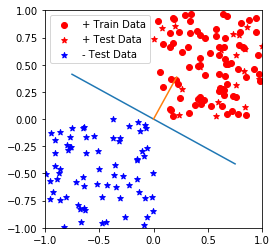

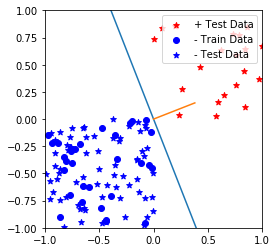

In [56]:
w1 = np.array([0,0])
w2 = np.array([0,0])
#print(w)

w1 = PLA(w1,train1, np.ones(80))
w2 = PLA(w2,train2, -1*np.ones(30))
h_w1 = find_sign(w1,train_set)
w_w2 = find_sign(w2,train_set)

print(w1)
print(w2)
x = np.linspace(-.75,.75,100)

y1 = -(1/w1[1])/(1/w1[0]) * x
y2 = -(1/w2[1])/(1/w2[0])  * x
plt.figure(1)
plt.scatter(train1[:,0],train1[:,1],c = 'red',label = "+ Train Data")
plt.scatter(test1[:,0],test1[:,1],marker ='*',c = 'red', label = "+ Test Data")
#plt.scatter(train2[:,0],train2[:,1],c = 'blue', label = "- Train Data")
plt.scatter(test2[:,0],test2[:,1],marker ='*',c = 'blue', label = "- Test Data")
plt.plot(x,y1)
plt.plot([0, w1[0]],[0, w1[1]])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

plt.figure(2)
#plt.scatter(train1[:,0],train1[:,1],c = 'red',label = "+ Train Data")
plt.scatter(test1[:,0],test1[:,1],marker ='*',c = 'red', label = "+ Test Data")
plt.scatter(train2[:,0],train2[:,1],c = 'blue', label = "- Train Data")
plt.scatter(test2[:,0],test2[:,1],marker ='*',c = 'blue', label = "- Test Data")
plt.plot(x,y2)
plt.plot([0, w2[0]],[0, w2[1]])
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')

(d)

In [64]:
tp_w1 = np.sum(np.where(find_sign(w1,test1) == 1,1, 0))
fn_w1 = test1.shape[0] - tp_w1
#print(fn_w1)
fp_w1 =  np.sum(np.where(find_sign(w1,test2) == 1,1, 0))
#print(fp_w1)
precision_w1 = tp_w1/(tp_w1+fp_w1)
recall_w1 = tp_w1/(tp_w1+fn_w1)
f1_score_w1 = 2*(precision_w1*recall_w1)/(precision_w1+recall_w1)
print('Precision for W1 = ', precision_w1)
print('Recall for W1 = ', recall_w1)
print('F1-score for W1 = ', f1_score_w1)

tp_w2 = np.sum(np.where(find_sign(w2,test1) == 1,1, 0))
fn_w2 = test1.shape[0] - tp_w2
#print(fn_w2)
fp_w2 =  np.sum(np.where(find_sign(w2,test2) == 1,1, 0))
#print(fp_w2)
precision_w2 = tp_w2/(tp_w2+fp_w2)
recall_w2 = tp_w2/(tp_w2+fn_w2)
f1_score_w2 = 2*(precision_w2*recall_w2)/(precision_w2+recall_w2)
print('Precision for W2 = ', precision_w2)
print('Recall for W2 = ', recall_w2)
print('F1-score for W2 = ', f1_score_w2)

Precision for W1 =  1.0
Recall for W1 =  1.0
F1-score for W1 =  1.0
Precision for W2 =  1.0
Recall for W2 =  1.0
F1-score for W2 =  1.0


(e)

### H2.3

(a)

Solving for $\phi$ we get:
$$\phi (\textbf{x})= \begin{bmatrix}
1 & -\sqrt{2} & -\sqrt{2} & 1 & 1 &\sqrt{2}\\
1 & -\sqrt{2} & \sqrt{2} & 1 & 1 &-\sqrt{2}\\
1 & \sqrt{2} & -\sqrt{2} & 1 & 1 &-\sqrt{2}\\
1 & \sqrt{2} & \sqrt{2} & 1 & 1 &\sqrt{2}
\end{bmatrix}$$

which is linearly seperable using the classifier:
$$h_\textbf{w}(\textbf{x}) = sign(\textbf{w}^T\textbf{x})$$
for 
$$\textbf{w} = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}$$

In [218]:
from math import sqrt
phi = np.array([[1, -sqrt(2),-sqrt(2), 1 , 1,sqrt(2)],[1, -sqrt(2),sqrt(2), 1 , 1,-sqrt(2)],[1, sqrt(2),-sqrt(2), 1 , 1,-sqrt(2)],[1, sqrt(2),sqrt(2), 1 , 1,sqrt(2)]])

y = np.array([1, -1, -1, 1])
G = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        G[i][j] = y[i]*y[j]*np.matmul(phi[i,:],phi[j,:])
print(G)

[[ 9. -1. -1.  1.]
 [-1.  9.  1. -1.]
 [-1.  1.  9. -1.]
 [ 1. -1. -1.  9.]]


(b) 
$$ G = \begin{bmatrix}
9 & -1 & -1 & 1\\
-1 & 9 & 1 & -1\\
-1 & 1 & 9 &-1\\
1 &-1 &-1 & 9
\end{bmatrix}$$

$$L(\alpha) = -\frac{1}{2}\alpha ^TG \alpha+\mathbb{1}^T\alpha$$

$$\nabla_{\alpha}L(\alpha) = -G\alpha+\mathbb{1}=\mathbb{0}$$

$$\begin{bmatrix}
-9 & 1 & 1 & -1\\
1 & -9 & -1 & 1\\
1 & -1 & -9 &1\\
-1 &1 &1 & -9
\end{bmatrix}
\begin{bmatrix}
\alpha_1\\
\alpha_2\\
\alpha_3\\
\alpha_4
\end{bmatrix} = 
\begin{bmatrix}
-1\\
-1\\
-1\\
-1
\end{bmatrix}$$

In [224]:
alpha = np.linalg.solve(-G,[-1,-1,-1,-1])
print(alpha)

[0.125 0.125 0.125 0.125]


$$\alpha = \begin{bmatrix}
.125&.125&.125&.125
\end{bmatrix}^T$$

(c)
$$\alpha \geq 0$$
$$\begin{bmatrix}
.125&.125&.125&.125
\end{bmatrix}\begin{bmatrix}
1\\
-1\\
-1\\
1
\end{bmatrix} $$$$=.125-.125-.125+.125 =0$$
$$\alpha^Ty = 0$$

(d)

W =  [0.         0.         0.         0.         0.         0.70710678]
Hw =  [ 1. -1. -1.  1.]


<StemContainer object of 3 artists>

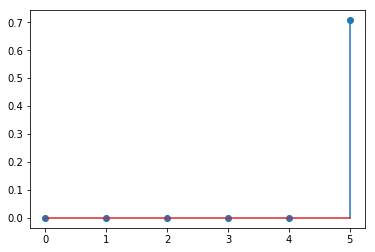

In [244]:
weight_vec = np.zeros(6)
alpha = [.125,.125,.125,.125]
for i in range(4):
    weight_vec = weight_vec + alpha[i]*y[i]*phi[i,:]
print('W = ' ,weight_vec)
h_w_kernel = np.zeros(4)
for i in range(4):
    h_w_kernel[i] = np.matmul(phi[i,:],weight_vec)
print('Hw = ', h_w_kernel)
plt.stem(weight_vec)

The 6th feature of the phi vector is the only one that has an effect on classification since the weight vector for all other features is 0.

### H2.4

In [66]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [67]:
y = np.array(mnist.target.astype(int))
x = np.array(mnist.data.astype(int))
X4 = x[y==4,:]
X9 = x[y==9,:]

In [69]:
print(X4.shape)
print(X9.shape)

(6824, 784)
(6958, 784)


In [87]:
train_data = np.array(X4[:4000])
train_data = np.concatenate((train_data,X9[:4000]),axis = 0)
train_label = 4*np.ones(train_data.shape[0])
train_label[4000:] = 9
#print(train_data.shape) 

4000
(8000, 784)


In [91]:
def generate_holdout():
    return np.random.choice(8000, 8000,replace=False)
train_indx = generate_holdout()
train_set = train_data[train_indx[:4000]]
train_set_label_ = train_label[train_indx[:4000]]
holdout_set = train_data[train_indx[4000:]]
holdout_label = train_label[train_indx[4000:]]


(4000,)


In [102]:
from sklearn import svm


In [ ]:
temp = np.linspace(-6,6,13)
base = 10 * np.ones(13)
c = np.power(base,temp)
holdout_Pe_1 = np.zeros(13)
holdout_Pe_2 = np.zeros(13)
for i in range(13):
    print('Error for C = ',c[i], 'degree = 1')
    clf= svm.SVC(C=c[i],kernel='poly',degree = 1)
    clf.fit(train_set,train_set_label_)
    holdout_Pe_1[i] = 1 - clf.score(holdout_set,holdout_label)
    print('\t',holdout_Pe_1[i])

for i in range(13):
    print('Error for C = ',c[i], 'degree = 2')
    clf= svm.SVC(C=c[i],kernel='poly',degree = 2)
    clf.fit(train_set,train_set_label_)
    holdout_Pe_2[i] = 1 - clf.score(holdout_set,holdout_label)
    print('\t',holdout_Pe_2[i])


Error for C =  1e-06 degree = 1
	 0.503
Error for C =  1e-05 degree = 1
	 0.503
Error for C =  0.0001 degree = 1


In [108]:
print(np.amin(holdout_Pe))

0.013000000000000012
